[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/4vel/python-intro/blob/main/Hometask/Task2_dmrf_visual.ipynb)

# Задание

* Используя данные об объектах недвижимости на сайте "наш.дом.рф" или cian.ru, провести мини-исследование рынка строящейся/готовой недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
#### Идеи для мини-исследования
* Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
* Рассчитать объемы вводимого жилья по регионам и по годам.
* Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах.
* Визуализировать разброс, связь, доли, распределение этих показателей по регионам.
* Сделать выводы по каждому из расчетов и графиков



Маппинг:
<table border="1">
    <tr><td>region</td><td>Номер региона</td></tr>
    <tr><td>developer.regRegionDesc</td><td>Название региона</td></tr>
    <tr><td>objElemLivingCnt</td><td>Жилая площадь</td></tr>
    <tr><td>objPriceAvg</td><td>Цена за квадратный метр</td></tr>
    <tr><td>objTransferPlanDt</td><td>Дата вывода в эксплуатацию</td></tr>
    <tr><td>objFloorCnt</td><td>Этажность домов</td></tr>    
    <tr><td>objFlatCnt</td><td>Количество квартир в доме</td></tr>    
    <tr><td>objElemParkingCnt</td><td>Количество парковочных мест</td></tr>    
</table>

## Задача 1
* Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import plotly.express as px
import numpy as np

import datetime as dt

In [48]:
df = pd.read_pickle('df_nashdomrf.pkl')
df.head(2)

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,metro.time,metro.isWalk,metro.colors,complexShortNm,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,13399,34754,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Оставляем только необходимые для анализа столбцы
df = df [['region', 'developer.regRegionDesc'  , 'objPriceAvg', 'objElemLivingCnt']]

In [56]:
df.head(3)

,region,developer.regRegionDesc,objPriceAvg,objElemLivingCnt
1,72,Тюменская область,47163.0,65
2,72,Тюменская область,67159.0,68
3,72,Тюменская область,47886.0,43


In [51]:
print(len(df))

11714


In [52]:
# Избавляемся от пустых значений
df.dropna (subset=['objPriceAvg', 'objElemLivingCnt'])
print(len(df))

11714


In [53]:
# Избавляемся от отрицательных и нулевых значений
df = df[(df.objElemLivingCnt > 0) & (df.objPriceAvg > 0)]
print(len(df))

7388


In [54]:
# Выводим среднюю цену по региону
average_prices = df.groupby('developer.regRegionDesc')['objPriceAvg'].mean() 
print(average_prices)

developer.regRegionDesc
Адыгея Республика                  115700.461538
Алтай Республика                    80085.444444
Алтайский край                      97960.056818
Амурская область                   144170.259259
Архангельская область              110053.782609
                                       ...      
Челябинская область                 94921.614583
Чеченская Республика               105285.600000
Чувашская Республика                97044.195402
Ямало-Ненецкий Автономный округ    142229.176471
Ярославская область                 79776.216867
Name: objPriceAvg, Length: 83, dtype: float64


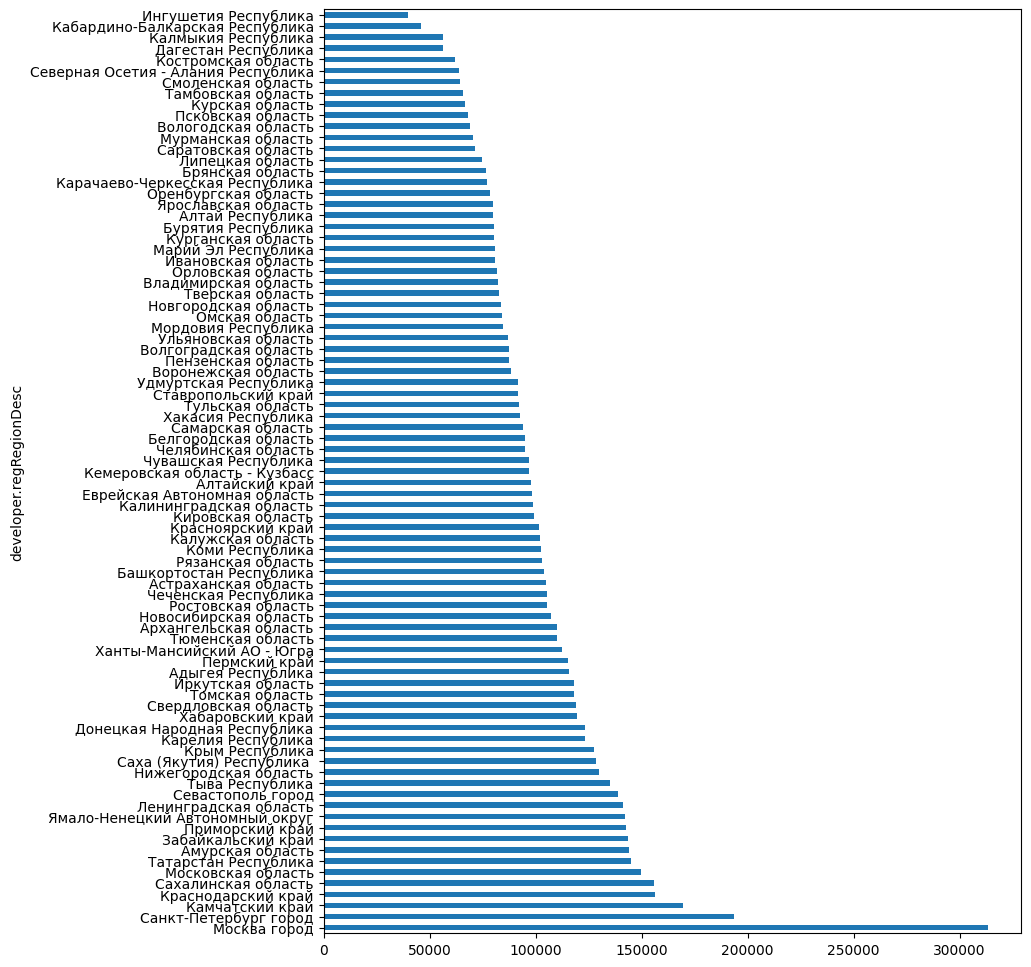

In [55]:
rcParams['figure.figsize'] = 9,12
average_prices.sort_values(ascending=False).plot(kind='barh')
plt.show()

Вывод: Самая большая цена на недвидимость в Москве, а самая маленькая в Республике Ингушетия

## Задача 2
* Рассчитать объемы вводимого жилья по регионам и по годам:

In [25]:
df2 = pd.read_pickle('df_nashdomrf.pkl')
df2.dropna (subset=['objTransferPlanDt'])
df2 = df2 [['region', 'developer.regRegionDesc', 'objTransferPlanDt', 'objElemLivingCnt' ]]
df2.head(2)

,region,developer.regRegionDesc,objTransferPlanDt,objElemLivingCnt
0,72,Тюменская область,28-02-2025 12:00,0
1,72,Тюменская область,28-02-2025 12:00,65


In [26]:
df2['objTransferPlanDt'] = pd.to_datetime(df2['objTransferPlanDt'], format='%d-%m-%Y %H:%M')

In [27]:
df2['objTransferPlanDt'] = df2['objTransferPlanDt'].dt.year.astype(str)

In [28]:
df2.head(2)

,region,developer.regRegionDesc,objTransferPlanDt,objElemLivingCnt
0,72,Тюменская область,2025.0,0
1,72,Тюменская область,2025.0,65


In [30]:
df2 = df2.groupby(['developer.regRegionDesc', 'objTransferPlanDt'])['objElemLivingCnt'].sum().reset_index()
df2.rename(columns={'objElemLivingCnt': 'totalLivingCnt'}, inplace=True)

In [77]:
df2.head(3)

,developer.regRegionDesc,objTransferPlanDt,totalLivingCnt
0,Адыгея Республика,2023.0,0
1,Адыгея Республика,2024.0,980
2,Адыгея Республика,2025.0,2430


In [31]:
df_grouped = df2.groupby(['developer.regRegionDesc', 'objTransferPlanDt'])['totalLivingCnt'].mean().reset_index()
df_grouped.head(3)

,developer.regRegionDesc,objTransferPlanDt,totalLivingCnt
0,Адыгея Республика,2023.0,0.0
1,Адыгея Республика,2024.0,980.0
2,Адыгея Республика,2025.0,2430.0


In [79]:
df_grouped.sort_values(by=['totalLivingCnt', 'developer.regRegionDesc'], ascending=[False, True])

,developer.regRegionDesc,objTransferPlanDt,totalLivingCnt
224,Москва город,2025.0,141307.0
223,Москва город,2024.0,90134.0
225,Москва город,2026.0,83732.0
233,Московская область,2025.0,66169.0
162,Краснодарский край,2026.0,63611.0
...,...,...,...
228,Москва город,nan,0.0
229,Московская область,2021.0,0.0
332,Санкт-Петербург город,2031.0,0.0
333,Санкт-Петербург город,2032.0,0.0


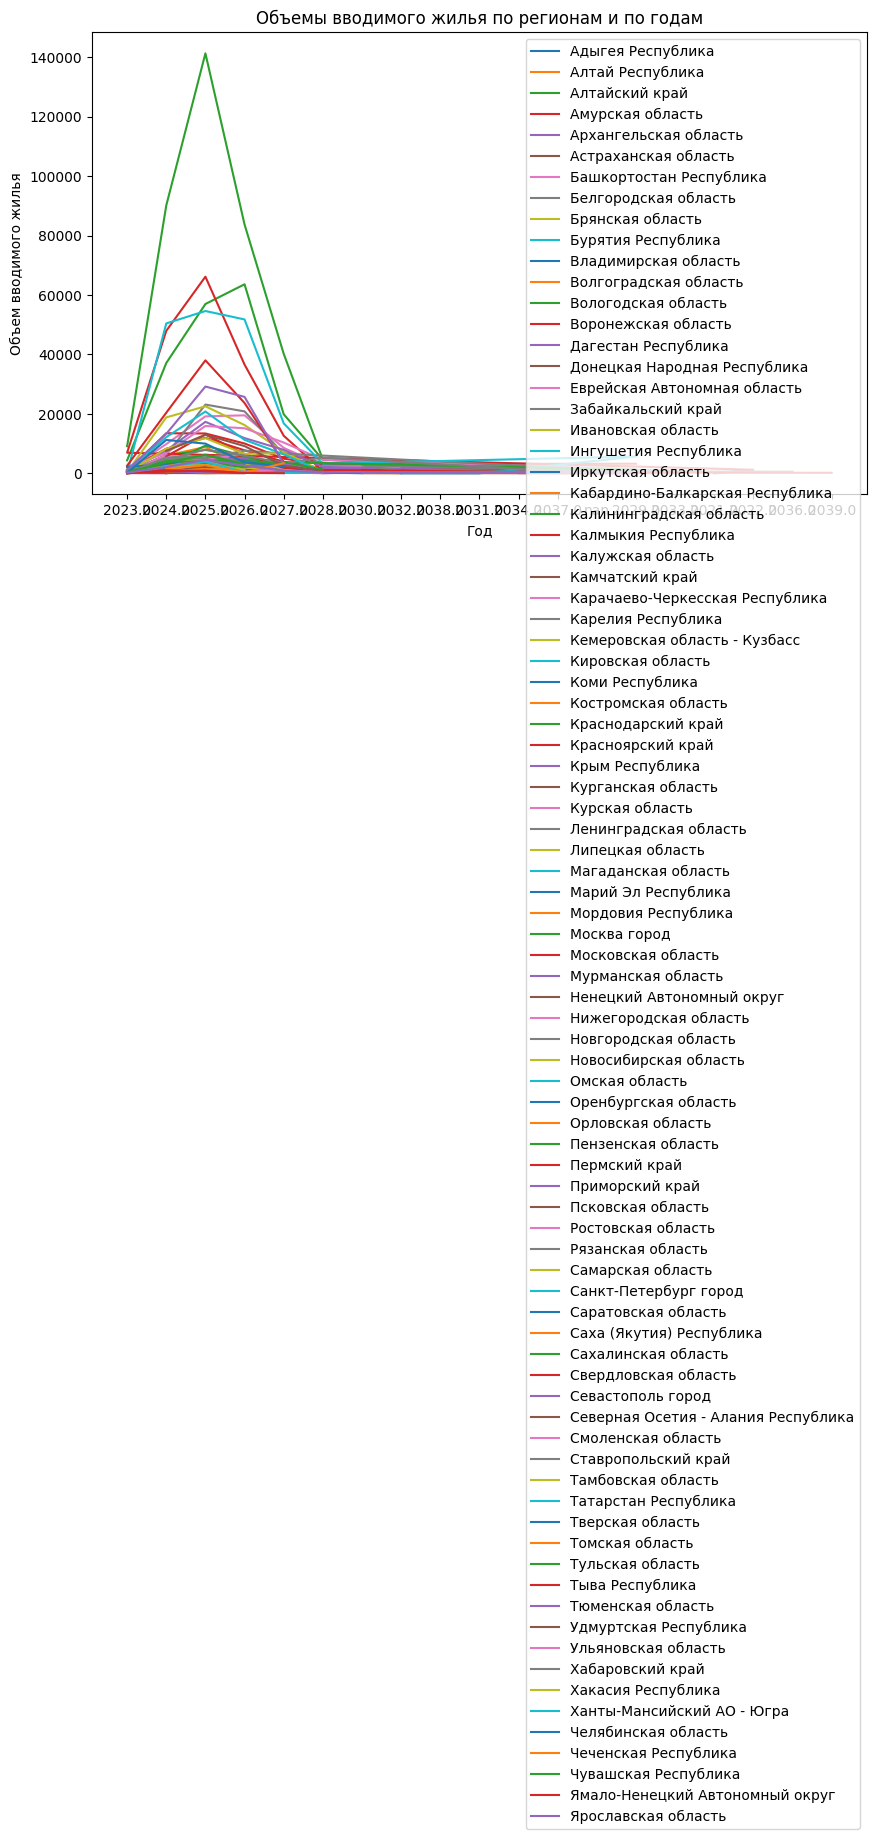

In [32]:
plt.figure(figsize=(10,6))
for region in df_grouped['developer.regRegionDesc'].unique():
    df2 = df_grouped[df_grouped['developer.regRegionDesc'] == region]
    plt.plot(df2['objTransferPlanDt'], df2['totalLivingCnt'], label=region)

plt.xlabel('Год')
plt.ylabel('Объем вводимого жилья')
plt.title('Объемы вводимого жилья по регионам и по годам')
plt.legend()
plt.show()

Вывод: Самый наибольший вывод жилья в эксплуатацию приходиться на 2025 год, в лидерах по выводу жилья находяться Московский регион.

## Задача 3
* Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах.
* Визуализировать разброс, связь, доли, распределение этих показателей по регионам.

In [52]:
df3 = pd.read_pickle('df_nashdomrf.pkl')
df3 = df3 [['region', 'developer.regRegionDesc', 'objPriceAvg', 'objFloorCnt', 'objFlatCnt', 'objElemParkingCnt', 'objElemLivingCnt']]
df3.head(2)

,region,developer.regRegionDesc,objPriceAvg,objFloorCnt,objFlatCnt,objElemParkingCnt,objElemLivingCnt
0,72,Тюменская область,50768.0,1,0,125,0
1,72,Тюменская область,47163.0,12,65,0,65


In [53]:
df3['totalPrice'] = df3['objPriceAvg'] * df3['objElemLivingCnt']
df3.head(2)

,region,developer.regRegionDesc,objPriceAvg,objFloorCnt,objFlatCnt,objElemParkingCnt,objElemLivingCnt,totalPrice
0,72,Тюменская область,50768.0,1,0,125,0,0.0
1,72,Тюменская область,47163.0,12,65,0,65,3065595.0


In [60]:
grouped_floor = df3.groupby(['developer.regRegionDesc'])['objFloorCnt'].mean()
grouped_flat = df3.groupby('developer.regRegionDesc').agg({'objFlatCnt' : 'sum'}).reset_index()
grouped_living = df3.groupby('developer.regRegionDesc').agg({'objElemLivingCnt' : 'sum'}).reset_index()
grouped_parking = df3.groupby('developer.regRegionDesc').agg({'objElemParkingCnt' : 'sum'})
grouped_price = df3.groupby('developer.regRegionDesc').agg({'totalPrice' : 'sum'}).reset_index()

In [61]:
grouped_floor.index.name = "Этажность квартир по регионам"

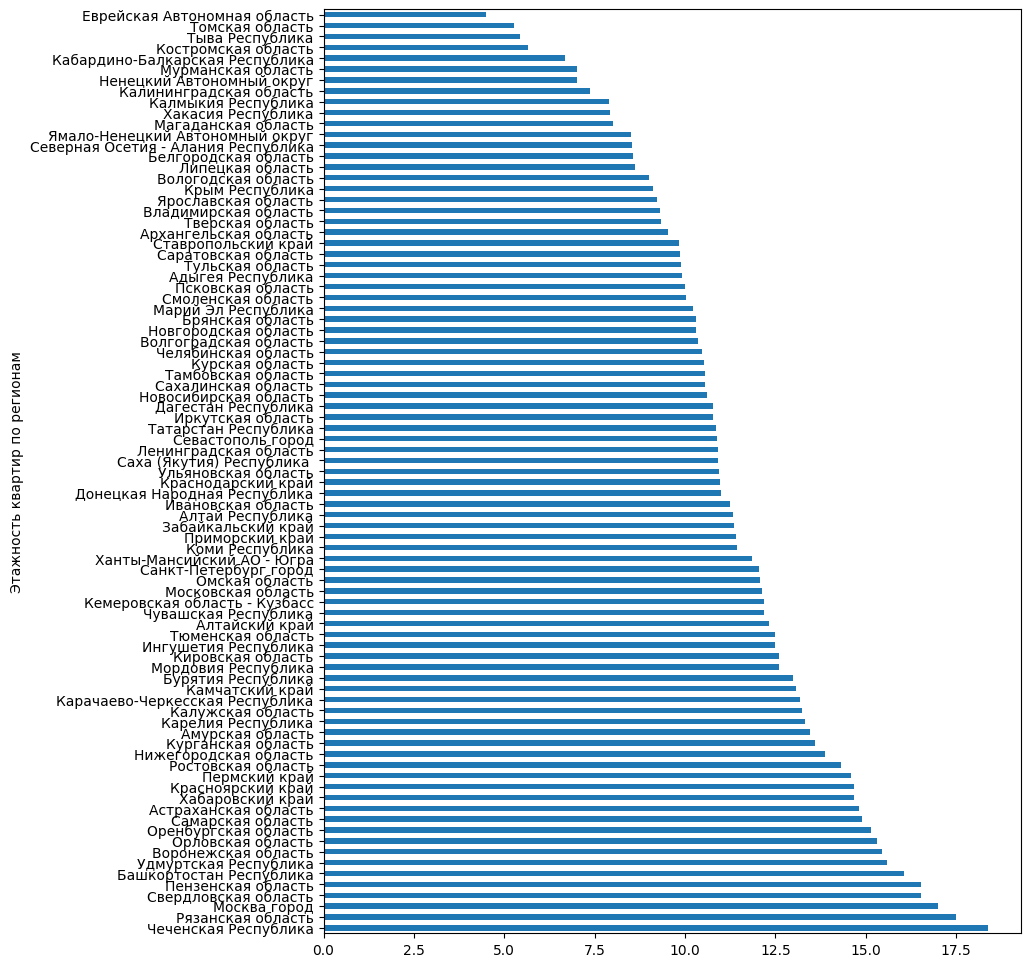

In [62]:
rcParams['figure.figsize'] = 9,12
grouped_floor.sort_values(ascending=False).plot(kind='barh')
plt.show()

Вывод: В Чеченской республике преобладают высокоэтажные строения  при этом в Еврейском автономном округе высокоэтажных строений почти нет, тут преобладают низкоэтажные строения.

In [63]:
grouped_flat.loc[grouped_flat['objFlatCnt'] < 20000, 'developer.regRegionDesc'] = 'Другие регионы' # Represent only large countries
fig = px.pie(grouped_flat, values='objFlatCnt', names='developer.regRegionDesc', title='Доли продаваемых квартир по регионам')
fig.show()

Вывод: На графике отражены самые крупные регионы по продаже квартир, такие как Москова, Краснодарский крае и пр. регионы с количеством продаваемых квартир у которых объём составляет менее 20 000(примерно менее 1% от рынка) объеденены в одну долю как Другие регионы.

In [64]:
grouped_living.loc[grouped_living['objElemLivingCnt'] < 15000, 'developer.regRegionDesc'] = 'Другие регионы' # Represent only large countries
fig = px.pie(grouped_living, values='objElemLivingCnt', names='developer.regRegionDesc', title='Доли площадей продаваемых квартир по регионам')
fig.show()

Пожожую картину мы наблюдаем и с долей площадей продаваемых объектов недвижимости.

In [70]:
grouped_parking.index.name = "Парковочные места по регионам"

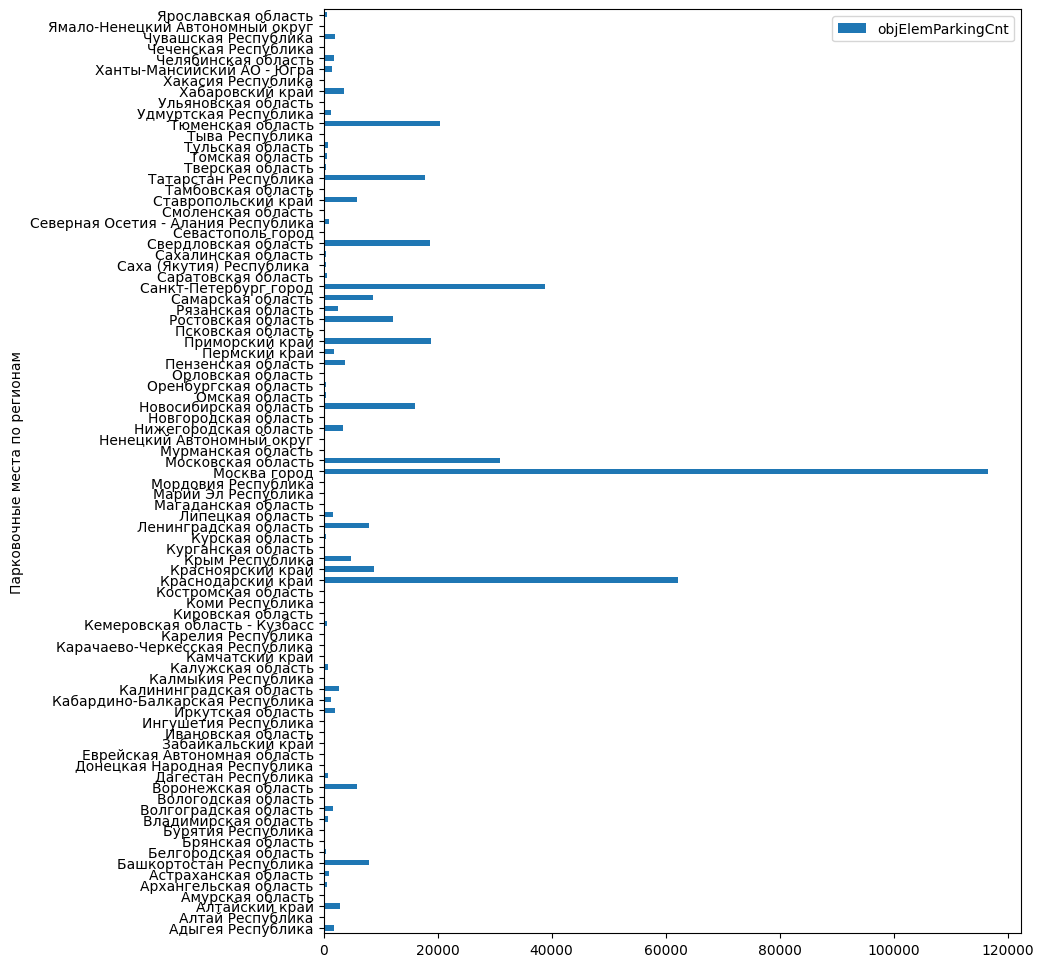

In [71]:
rcParams['figure.figsize'] = 9,12
grouped_parking.plot(kind='barh')
plt.show()

Из графика видно, что только самые крупные Города лил регионы оборудованы парковочными местами, но у большинства регионов доля поарковочных мест сугубо мала.

In [79]:
grouped_price.loc[grouped_price['totalPrice'] < 2.e9, 'developer.regRegionDesc'] = 'Другие регионы' # Represent only large countries
fig = px.pie(grouped_price, values='totalPrice', names='developer.regRegionDesc', title='Доли объёмов продаж по регионам')
fig.show()

Из графика видно, что в Москве являеться самым крупным рынком недвижимости, её денежный оботот составляет 33% от всего рпынка недвижимости в стране. Также можно выделить ещё 3 крупных регионав данном сегменте: Питербург, Московскую область и Краснадарский край, остальные регионы занимают незначительный объём данного рынка.